#Inicio de proyecto:
##importacion de bibliotecas


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px 

# 2.- Trabajo y limpieza de datos

In [3]:
#importacion de archivo a trabajar 'games.csv' 
games_df = pd.read_csv('games.csv')
#Cambiando titulos de columnas a minusculas
games_df.columns = games_df.columns.str.lower()

#============== retrabajos columnas================
#trabajo columna 'name'
    #Cambiar los Nan a 'Unknown'
games_df['name'].fillna('Unknown', inplace= True)
        
##trabajo columna 'year of release'
    #cambiar tipo de datos a int en lugar de float. 
games_df['year_of_release'].fillna(0.0, inplace= True)
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

#trabajo columna 'genre'
games_df['genre'].fillna('Unknown', inplace= True)

#trabajo columna 'critic_score'
games_df['critic_score'].fillna(0.0, inplace=True)

#trabajo columna 'user_score' 
games_df['user_score'].fillna(0.0, inplace=True)


        #Tambien se va a cambiar el score TBD debido a que sigue en discusion, por lo tanto no tiene un score aun, por lo tanto es 0 para fines estadisticos
        #se hara una nota donde se explica que algunos user_score siguen en deliberacion para justificar ciertos numeros\
games_df['user_score'].replace('tbd', 0.0, inplace=True)
games_df['user_score'] = games_df['user_score'].astype(float)
        #tambien se multiplicara por 10 el user_score para que coincida con el formato de critic_score
games_df['user_score'] = games_df['user_score']*10


#trabajo columna 'rating' 
games_df['rating'].fillna('NR', inplace=True)

#Columna de ventas totales
games_df['total_sales'] = games_df['na_sales']+games_df['jp_sales']+games_df['eu_sales'] + games_df['other_sales']


#=============comprobacion datos despues de cambios =========#
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## 3.- Analisis de Datos 
    3.1 Cuantos juegos fueron lanzados en diferentes a;os, son significativos los datos de cada periodo? [1]
    3.2 Variacion de ventas de una plataforma a otra. variaciones por a;o por plataforma.
    3.3 Plataformas lideres en ventas
    3.4 Diagrama de Caja para ventas globales de todos los juegos por plataforma
    3.5 Grafico de dispersion y calcular las correlacion entre resenas y las ventas. saca conclusiones
    3.6 Generar grafico de ventas por genero y ver generos mas rentables
    

## 3.1 Juegos lanzados por a;o, se comprobara si hay alguna relacion entre la venta de de juegos y el a;o que fueron lanzados [1]

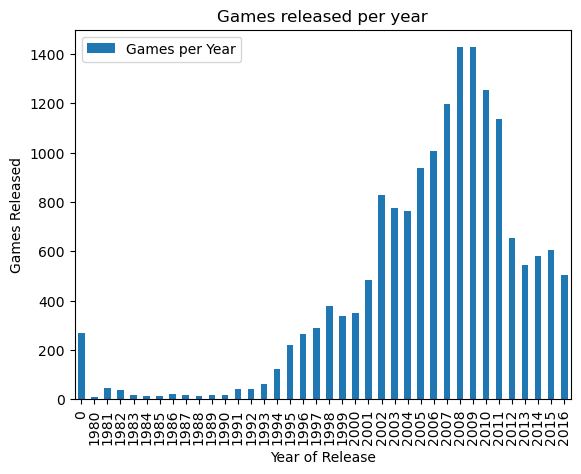

In [4]:
games_released_table = pd.pivot_table(games_df, index= 'year_of_release', values= 'name', aggfunc='count')
games_released_table.plot(kind='bar',xlabel='Year of Release',ylabel='Games Released',title='Games released per year')
plt.legend(['Games per Year'])

plt.show()

Conclusion inicial: Los a;os con mayor publicacion de juegos son del 2007 al 2011. los primeros a;os se podria deber a la cantidad de consolas que habia y la jugabilidad total de cada uno de los juegos publicados, antes se jugaban menos juegos con mayor competencia. En la actualidad nuevamente bajo la cantidad de consolas competidoras por lo que el numero de juego aumenta PERO en los a;os con mayores ventas podria ser resultado de lanzamiento de nuevas consolas que tuvieron que publicar mas juegos para la nueva generacion de equipamento, especificaciones y graficos. Esto se podria corroborar con la informacion de lanzamiento de las consolas respectivamente y comparar la publicaciones de juegos.

## 3.2 Variacion de ventas de entre plataformas.

#### 3.2.1 Ventas entre plataformas.

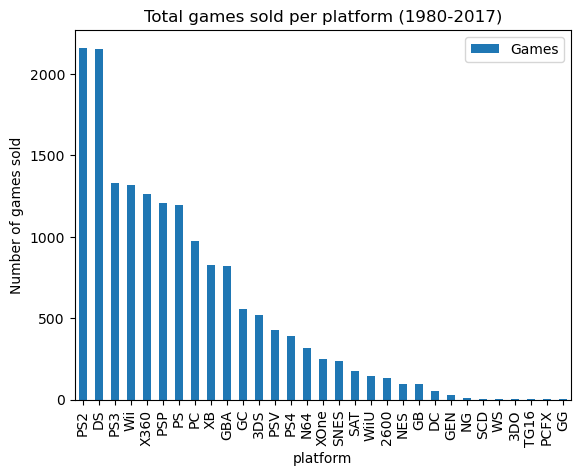

In [5]:
console_sales = games_df.groupby(['platform'])['total_sales'].count().reset_index().sort_values(by='total_sales', ascending=False)
sales_table = console_sales.plot(x='platform', y='total_sales', kind='bar', ylabel='Number of games sold',xlabel='platform', title='Total games sold per platform (1980-2017)')
plt.legend(['Games'])
plt.show()


Conclusion 2: La consola con la mayor venta de juegos fue la PlayStation 2 con mas de 2000 ventas de juegos, en un segundo lugar muy cercano se encuentra la Nintendo DS. Se tomaran en cuenta las plataformas dentro del top 5 para el analisis de ventas por a;o.

#### 3.2.2 Ventas de top 5 plataformas por a;o.

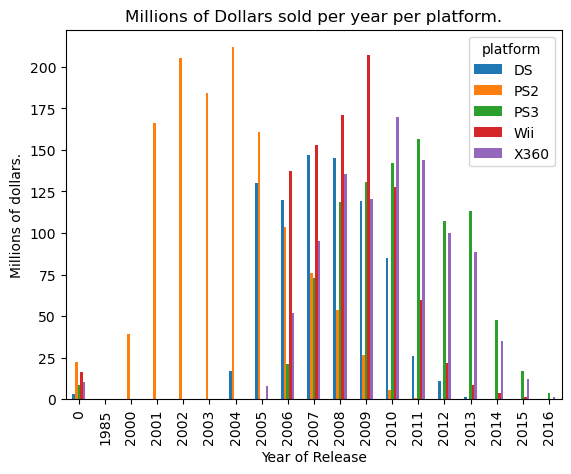

In [6]:
console_sales_per_year = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
console_sales_per_year = console_sales_per_year[
    (console_sales_per_year['platform']=='PS2')|
    (console_sales_per_year['platform']=='DS')|
    (console_sales_per_year['platform']=='PS3')|
    (console_sales_per_year['platform']=='Wii')|
    (console_sales_per_year['platform']=='X360')
    ]

table_spy = pd.pivot_table(console_sales_per_year, index='year_of_release',values='total_sales', columns='platform', aggfunc='sum')
table_spy.plot(kind='bar',label='Millions of Dollars',xlabel='Year of Release',ylabel='Millions of dollars.', title='Millions of Dollars sold per year per platform.')
plt.show()


### Conclusion 3.2.2: Este modelo nos deja ver que PS2 tuvo dominio en los primeros a;os de los 2000's. Lo que se puede apreciar de esta informacion es que todas las consolas tienen una curva de campana desde su despliegue, se traslapa con la salida del nuevo modelo de la compa;oa y procede a retirarse. se podria aplicar esta hipotesis viendo los a;os de salida que coincidan con el tiempo de vida de la consola para determinar que consola o compa;ia tendra las mayores ventas del 2017. Usando esta hipotesis rapidamente como ejemplo pude comprobar a traves de una busqueda de internet rapida que por ejemplo:

### El Xbox360 empezo a decaer en ventas al rededor del 2011, por lo que Microsoft tuvo que haber encontrado su punto de vencimiento de esa consola e iniciaron la fabricacion de la siguiente, siendo esta el Xbox One, el cual fue lanzado en Noviembre del 2013. 
### Misma hipotesis aplica para PlayStation, solo queda comprobarla matematicamente.


# 


## 3.3 Tiempo de vida de las plataformas.

#### Observando los datos anteriores se puede deducir que el tiempo de vida de mercado de las plataformas depende directamente de las ventas. Si una plataforma no tiene buenas ventas, se descontinua la creacion de contenido para dicha consola y se inicia el dise;o del reemplazo. A esto tambien habria que tomar en cuenta las rese;as de usuarios de juegos.

## 3.4 Ventas globales de las plataformas principales

<Axes: xlabel='total_sales', ylabel='platform'>

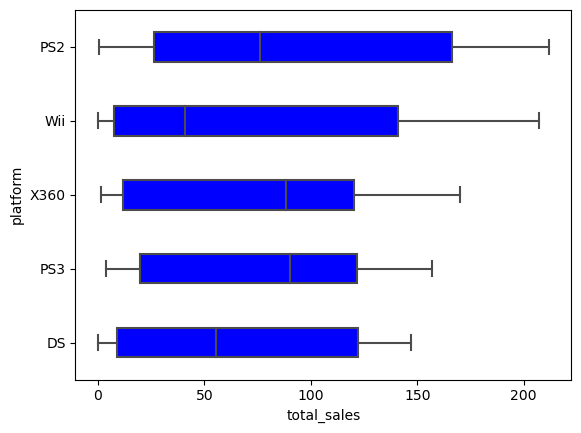

In [7]:
sns.boxplot(data=console_sales_per_year,saturation=1,color='blue',width=.4,y='platform',x='total_sales')

Conclusion 3.4 Las ventas promedio de cada plataforma varian bastante entre si. esto se podria deber a la cantidad de tiempo que estuvo la consola antes de que saliera la nueva consola, dicho caso no aplicaria entre PS2 Y PS3. Tambien podria explicarse debido al genero de juegos mas vendidos por cada consola dado que al menos en el Caso de Nintendo casi no se tienen juegos pesados y de multijugador de plataforma para 16 o mas jugadores en linea. Nintendo se especializa en juegos locales y de historia enfocado a la experiencia mas que al multijugador. Lo que podria suceder con Nintendo como marca es que veamos que iteraciones de juegos se hayan ido actualizando o remasterizando como clasicos.


## 3.5. Rese;as de usuarios y criticos.
Se buscara la correlacion entre las rese;as de usuarios con las ventas de la plataforma

,name,platform,total_sales,user_score,critic_score
17,Grand Theft Auto: San Andreas,PS2,20.81,90.0,95.0
24,Grand Theft Auto: Vice City,PS2,16.15,87.0,95.0
28,Gran Turismo 3: A-Spec,PS2,14.97,84.0,95.0
38,Grand Theft Auto III,PS2,13.10,85.0,97.0
48,Gran Turismo 4,PS2,11.65,85.0,89.0
...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,0.01,0.0,0.0
16671,Kanokon: Esuii,PS2,0.01,0.0,0.0
16683,Scarlett: Nichijou no Kyoukaisen,PS2,0.01,0.0,0.0
16689,Real Rode,PS2,0.01,0.0,0.0



La correlacion entre calificacion de criticos y total de ventas es 0.3007217189482493

La correlacion entre calificacion de usuarios y total de ventas es 0.262265688908458

La correlacion entre calificacion de usuarios y calificacion de usuarios es 0.8070200242104862


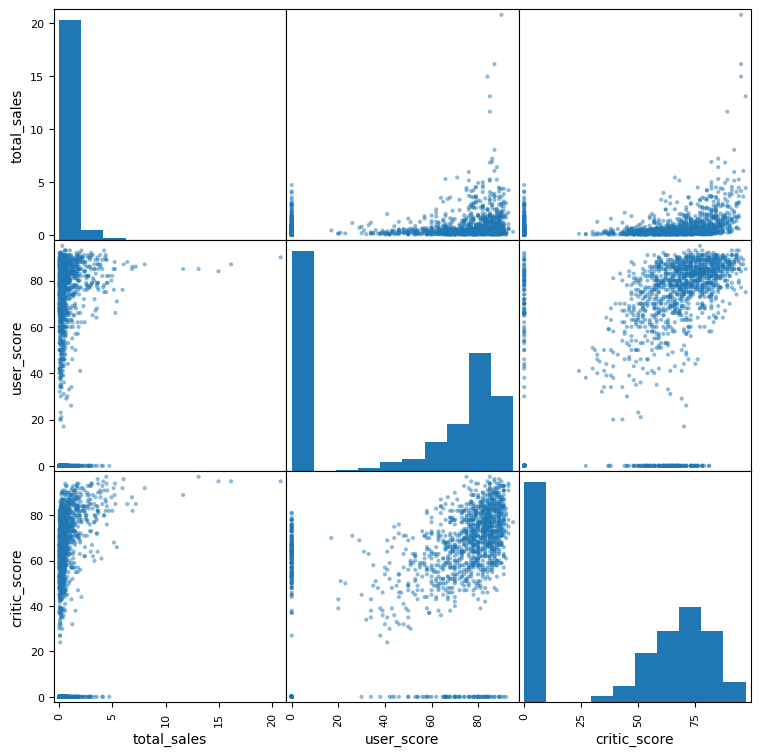

In [14]:
list1 = ['name','platform','total_sales','user_score','critic_score']
ps2_sales = games_df[list1]
ps2_sales = ps2_sales[(ps2_sales['platform']=='PS2')]
display(ps2_sales)
ps2_corr_1=ps2_sales['total_sales'].corr(ps2_sales['user_score'])
ps2_corr_2=ps2_sales['total_sales'].corr(ps2_sales['critic_score'])
ps2_corr_3=ps2_sales['user_score'].corr(ps2_sales['critic_score'])

print()
print(f'La correlacion entre calificacion de criticos y total de ventas es {ps2_corr_2}')
print()
print(f'La correlacion entre calificacion de usuarios y total de ventas es {ps2_corr_1}')
print()
print(f'La correlacion entre calificacion de usuarios y calificacion de usuarios es {ps2_corr_3}')
pd.plotting.scatter_matrix(ps2_sales,figsize=(9,9))
plt.show()

### La correlacion entre calificaciones y las ventas tienen una correlacion positiva mas no pareciese influenciar fuertemente las ventas. podria deberse a que no mucha gente califica los juegos. Si hay una correlacion directa entre las criticas de usuarios y criticos profesionales.

## 3.6 Distribucion de generos de juegos.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NR,0.01


,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


<Axes: title={'center': 'Most sold game genres'}, xlabel='Games Genres', ylabel='Total Sales(MM)'>

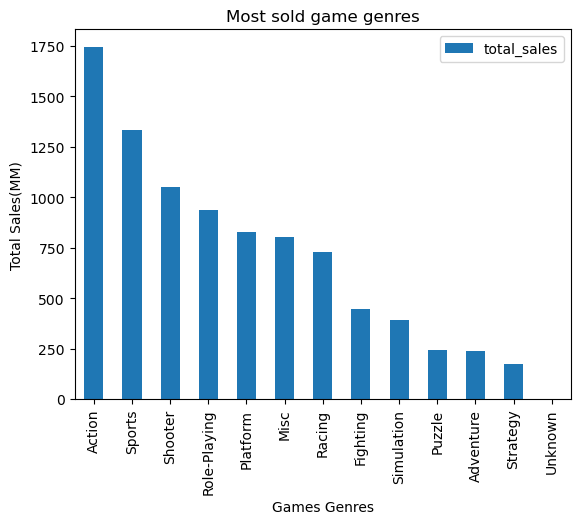

In [24]:
display(games_df)
games_genre = games_df.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
display(games_genre)


#table_spy = pd.pivot_table(console_sales_per_year, index='year_of_release',values='total_sales', columns='platform', aggfunc='sum')
#table_spy.plot(kind='bar',label='Millions of Dollars',xlabel='Year of Release',ylabel='Millions of dollars.', title='Millions of Dollars sold per year per platform.')

games_genre.plot(kind='bar', x='genre',y='total_sales',xlabel='Games Genres',ylabel='Total Sales(MM)', title='Most sold game genres')
